In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import seaborn as sns




In [16]:
OR_df=pd.read_excel('../content/Online Retail.xlsx')
OR_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
OR_df.Country.value_counts().reset_index().head(20)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [18]:
OR_df.CustomerID.unique().shape

(4373,)

In [19]:
(OR_df.CustomerID.value_counts()/sum(OR_df.CustomerID.value_counts())*100).head(13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

In [20]:
OR_df.StockCode.unique().shape

(4070,)

In [21]:
OR_df.Description.unique().shape

(4224,)

In [22]:
'''From the above, we observed that there is a mismatch between StockCode and Description and also number of Descriptions more than the Stock code values,which means that we have multiple descriptions for some of the Stockcodes'''

des_df=OR_df.groupby(['Description','StockCode']).count().reset_index()
des_df.StockCode.value_counts()[des_df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,23343,5


In [23]:
OR_df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [24]:
OR_df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
#The output of the two attributes having negitive values,which means that may have some return transactions in this data.

In [25]:
OR_df=OR_df[OR_df.Country=='United Kingdom']
OR_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
OR_df['Amount']=OR_df.Quantity*OR_df.UnitPrice
OR_df['Amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Amount, dtype: float64

In [27]:
OR_df=OR_df[~(OR_df['Amount']<0)]
OR_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
OR_df=OR_df[~(OR_df.CustomerID.isnull())]
print(OR_df.shape)
OR_df.head()

(354345, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
reference_date=OR_df.InvoiceDate.max()
reference_date=reference_date+datetime.timedelta(days=1)#timedelta function returns to total number of seconds
print(OR_df.InvoiceDate.max(),OR_df.InvoiceDate.min())
reference_date

2011-12-09 12:49:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:49:00')

In [30]:
#We will construct a reference variable as number of days before the reference date when a customer last made a purchase.
OR_df['days_since_last_purchase']=reference_date-OR_df.InvoiceDate
OR_df['days_since_last_purchase_num']=OR_df['days_since_last_purchase'].astype('timedelta64[D]')
OR_df['days_since_last_purchase_num'].head()

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [31]:
customer_history_df=OR_df.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
print(customer_history_df.describe())
customer_history_df.head()

         CustomerID      Recency
count   3921.000000  3921.000000
mean   15561.471563    92.188472
std     1576.823683    99.528995
min    12346.000000     1.000000
25%    14208.000000    18.000000
50%    15569.000000    51.000000
75%    16913.000000   143.000000
max    18287.000000   374.000000


<ipython-input-31-7b1d901ded42>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  customer_history_df=OR_df.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]


,CustomerID,Recency
0,12346.0,326.0
1,12747.0,2.0
2,12748.0,1.0
3,12749.0,4.0
4,12820.0,3.0


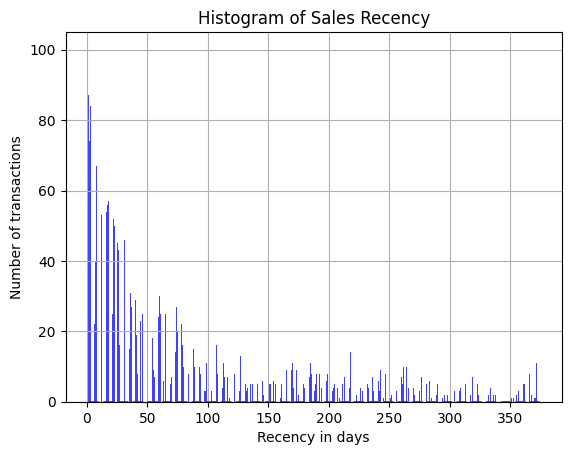

In [32]:
x=customer_history_df.Recency
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='blue',alpha=0.75)#alpha=transparency parameter
# Add a best fit line
y=scipy.stats.norm.pdf(bins,mu,sigma)#norm.pdf-probability density function for norm
l=plt.plot(bins,y,'r--',lw=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

In [ ]:
#We have a skewd distribution of sales recency with a much higher frequent number of transactions and a fairly unifirm number of sales less in recent transactions.

In [33]:
customer_monetary_val=OR_df[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.Amount=customer_history_df.Amount+0.001
customer_freq=OR_df[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Amount':'Frequency'},inplace=True)
customer_history_df=customer_history_df.merge(customer_freq,how='outer')

customer_history_df=pd.DataFrame(customer_history_df,columns=['CustomerID','Recency','Amount','Frequency'])
customer_history_df.head()

,CustomerID,Recency,Amount,Frequency
0,12346.0,326.0,77183.601,1
1,12747.0,2.0,4196.011,103
2,12748.0,1.0,33719.731,4596
3,12749.0,4.0,4090.881,199
4,12820.0,3.0,942.341,59


In [34]:
from sklearn import preprocessing
customer_history_df['Recency_log'] = customer_history_df['Recency'].apply(math.log)
customer_history_df['Frequency_log'] = customer_history_df['Frequency'].apply(math.log)
customer_history_df['Amount_log'] = customer_history_df['Amount'].apply(math.log)
feature_vector=['Recency_log','Frequency_log','Amount_log']
X=customer_history_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

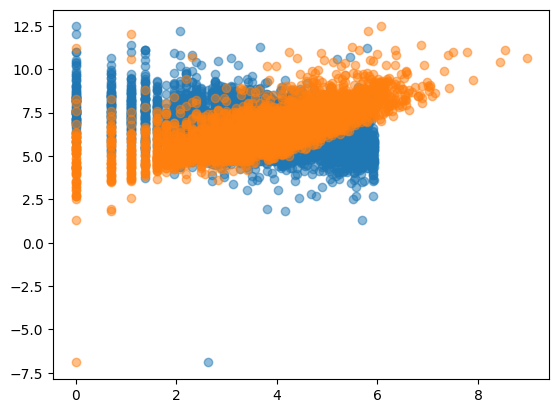

In [35]:
#Visualizing Recency and Frequency vs Monetary Value (Scaled)


plt.scatter(customer_history_df.Recency_log,customer_history_df.Amount_log,alpha=0.5)

plt.scatter(customer_history_df.Frequency_log,customer_history_df.Amount_log,alpha=0.5)

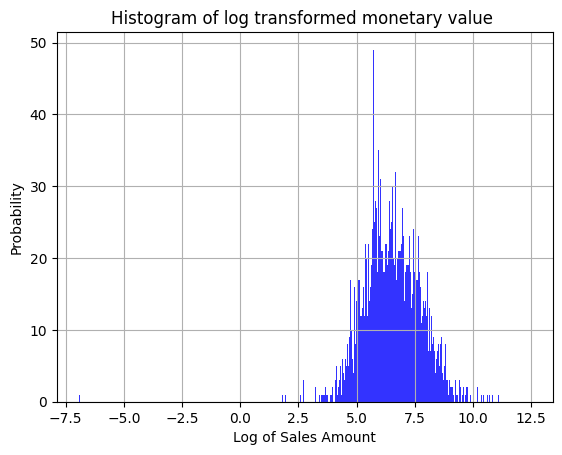

In [36]:
x=customer_history_df.Amount_log
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=0.8)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title('Histogram of log transformed monetary value ')
plt.grid(True)
plt.show()

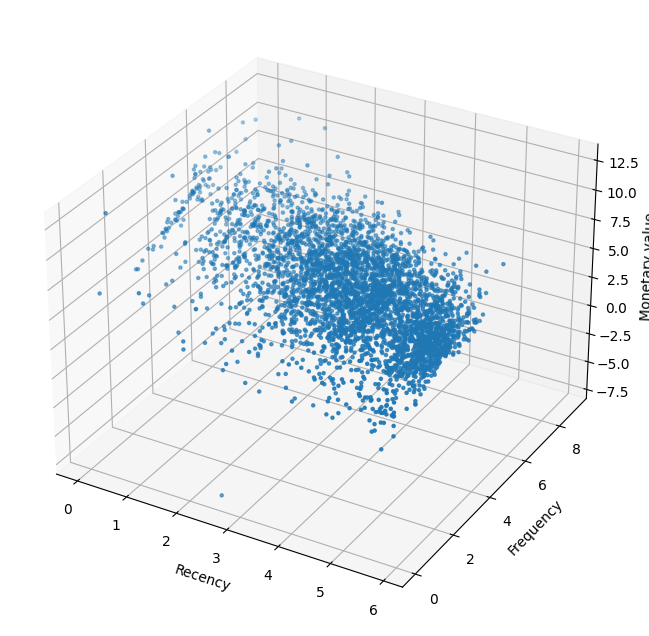

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=customer_history_df.Recency_log
ys=customer_history_df.Frequency_log
zs=customer_history_df.Amount_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [ ]:
#We can observed that from 3D plot, people who buy with a higher frequency and more Recency tends to spend more based on the increasing trend in monetray value corresponding inceasing and decreasing trend on frequency and recency, respectively.

